In [0]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0-rc3


In [0]:
from tensorflow import keras

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Flatten,Conv1D,MaxPooling1D,GlobalMaxPooling1D,Dense,Embedding

In [12]:
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [0]:
#we can use large conv window of size 7/9 unlike 3*3 in 2D

In [15]:
model = Sequential()
model.add(Embedding(max_features,128,input_length=max_len))
model.add(Conv1D(32,7,activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32,7,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [0]:
from keras.optimizers import RMSprop

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [19]:
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.7574 - acc: 0.5125 - val_loss: 0.6902 - val_acc: 0.5300
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.6741 - acc: 0.6401 - val_loss: 0.6745 - val_acc: 0.6188
Epoch 3/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.6371 - acc: 0.7580 - val_loss: 0.6314 - val_acc: 0.7050
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.5565 - acc: 0.8087 - val_loss: 0.5205 - val_acc: 0.7958
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4302 - acc: 0.8438 - val_loss: 0.4295 - val_acc: 0.8308
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3490 - acc: 0.8634 - val_loss: 0.3965 - val_acc: 0.8410
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.3094 - acc: 0.8705 - val_loss: 0.3993 - val_acc:

In [0]:
hist = history.history

In [21]:
hist.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
acc = hist['acc']
loss = hist['loss']
val_loss = hist['val_loss']
val_acc = hist['val_acc']

In [0]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


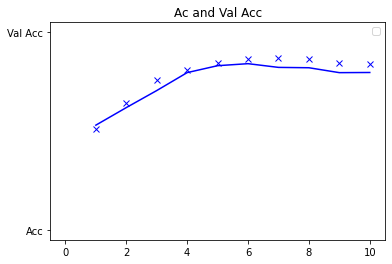

<Figure size 432x288 with 0 Axes>

In [26]:
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bx','Acc')
plt.plot(epochs,val_acc,'b','Val Acc')
plt.title('Ac and Val Acc')
plt.legend()
plt.figure()
plt.show()